In [2]:
import utilities as ut
import networkx as nx
import Complexity as cx
import matplotlib.pyplot as plt
import collections
from math import log

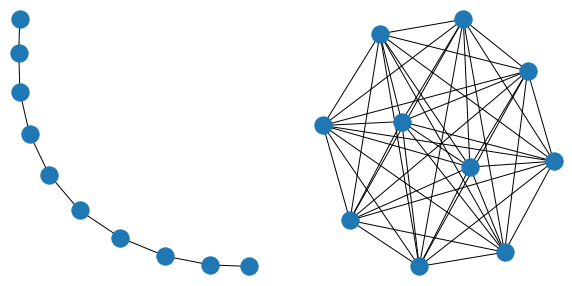

In [10]:
n = 10
G1 = nx.path_graph(n)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
nx.draw(G1)
G2=nx.gnp_random_graph(n,1)
plt.subplot(1,2,2)
nx.draw(G2)
plt.savefig("figures/path_clique.eps",format="eps")

In [3]:
n=15
graphs,df = ut.random_networks(n,False,1000)

In [2]:
c1est = [cx.C1est(g) for g in graphs]
c1espec = [cx.C1espec(g) for g in graphs]
c2espec = [cx.C2espec(g) for g in graphs]

NameError: name 'graphs' is not defined

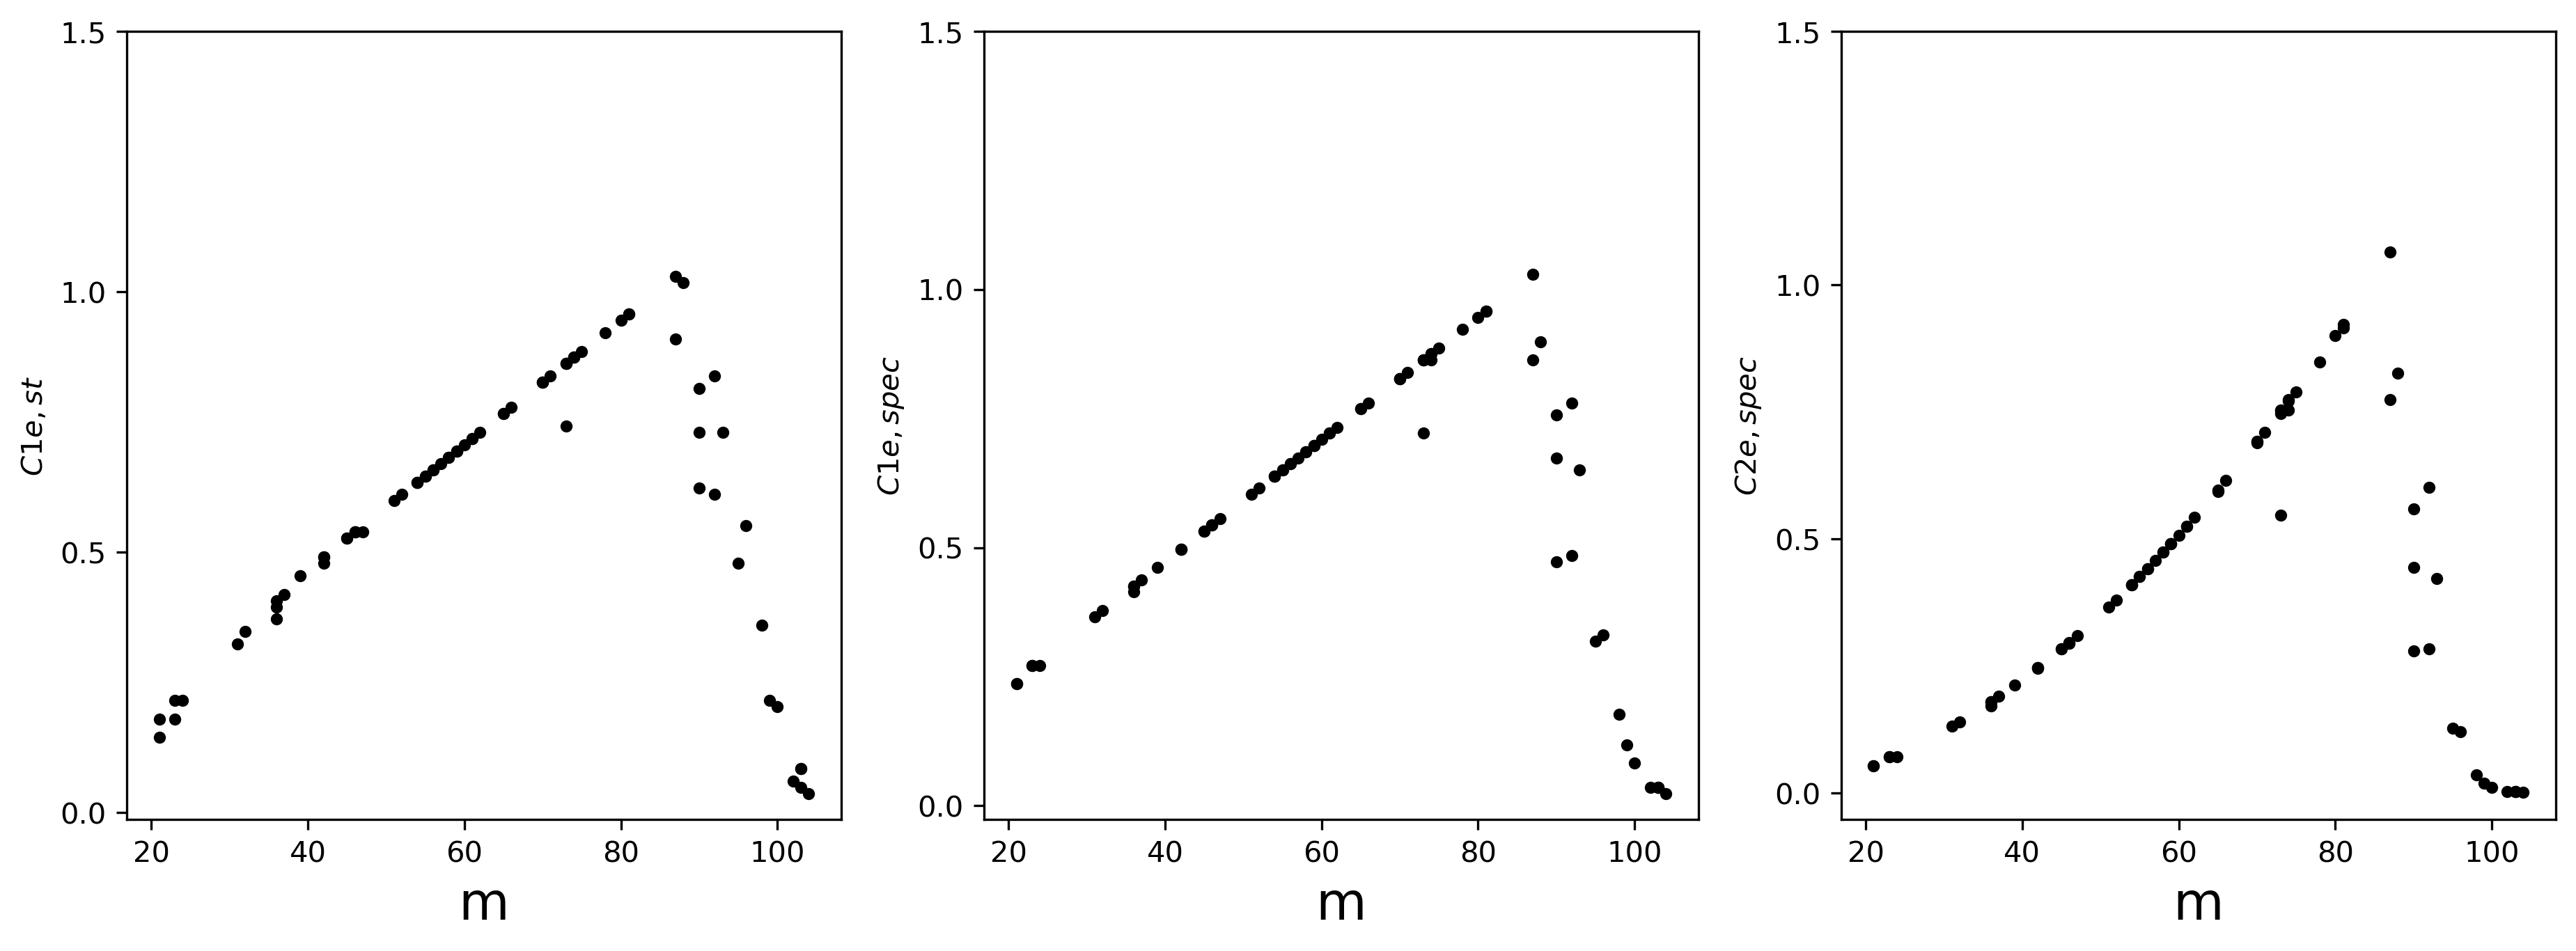

In [13]:
fig,axes = plt.subplots(1, 3,figsize = ([15,5]))
axes[0].scatter(df["Number_of_edges"],c1est,s=10,color = "black")
axes[1].scatter(df["Number_of_edges"],c1espec,s=10,color = "black")
axes[2].scatter(df["Number_of_edges"],c2espec,s=10,color = "black")
for item in axes:
    item.set_yticks([0,0.5,1,1.5])
    item.set_xlabel("m",fontsize =18)
axes[0].set_ylabel("$C1e,st$",fontsize= 18)
axes[1].set_ylabel("$C1e,spec$",fontsize= 18)
axes[2].set_ylabel("$C2e,spec$",fontsize= 18)
fig.savefig("figures/subgraph_measures.eps",format="eps")

In [15]:
n = [6,7,8]
c2graphs= [];dfs= []
for item in n:
    g,d = ut.random_networks(item,True,50)
    c2graphs.append(g);dfs.append(d)

In [16]:
c2especs = []
for item in c2graphs:
    temp_result = [cx.C2espec(g) for g in item]
    c2especs.append(temp_result)

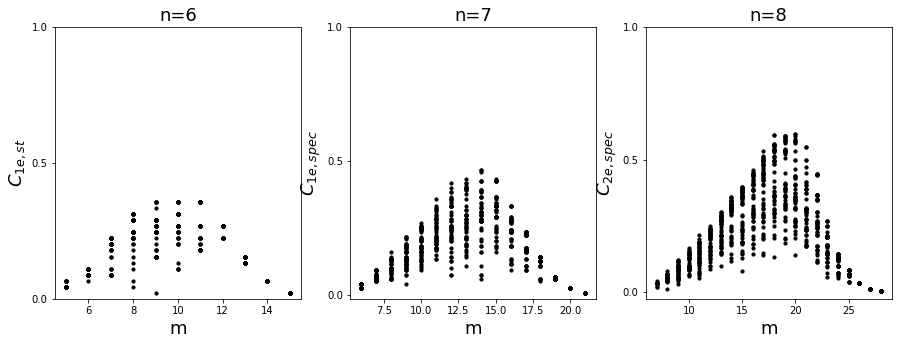

In [17]:
fig,axes = plt.subplots(1,3,figsize = (15,5))
for i in range(len(n)):
    axes[i].scatter(dfs[i]["Number_of_edges"],c2especs[i],s=10,color = "black")
    axes[i].set_yticks([0,0.5,1])
    axes[i].set_title("n="+str(n[i]),fontsize= 18)
    axes[i].set_xlabel("m",fontsize= 18)
axes[0].set_ylabel("$C_{1e,st}$",fontsize= 18)
axes[1].set_ylabel("$C_{1e,spec}$",fontsize= 18)
axes[2].set_ylabel("$C_{2e,spec}$",fontsize= 18)
fig.savefig("figures/c2espec.eps",format="eps")

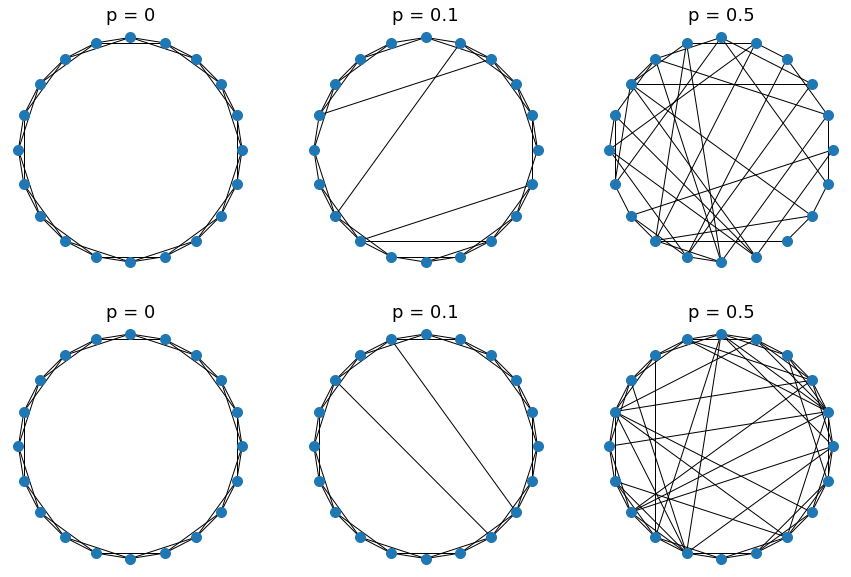

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
nx.draw_circular(nx.watts_strogatz_graph(20,4,0),node_size=100)
plt.title("p = 0",fontsize= 18)
plt.subplot(2,3,2)
nx.draw_circular(nx.watts_strogatz_graph(20,4,0.1),node_size=100)
plt.title("p = 0.1",fontsize= 18)
plt.subplot(2,3,3)
nx.draw_circular(nx.watts_strogatz_graph(20,4,0.5),node_size=100)
plt.title("p = 0.5",fontsize= 18)

plt.subplot(2,3,4)
nx.draw_circular(nx.newman_watts_strogatz_graph(20,4,0),node_size=100)
plt.title("p = 0",fontsize= 18)
plt.subplot(2,3,5)
nx.draw_circular(nx.newman_watts_strogatz_graph(20,4,0.1),node_size=100)
plt.title("p = 0.1",fontsize= 18)
plt.subplot(2,3,6)
nx.draw_circular(nx.newman_watts_strogatz_graph(20,4,0.5),node_size=100)
plt.title("p = 0.5",fontsize= 18)
plt.savefig("figures/small_world_network_model.eps",format = "eps")

In [19]:
def degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()],reverse = True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    deg = list(deg)
    cnt = list(cnt)
    return deg,cnt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


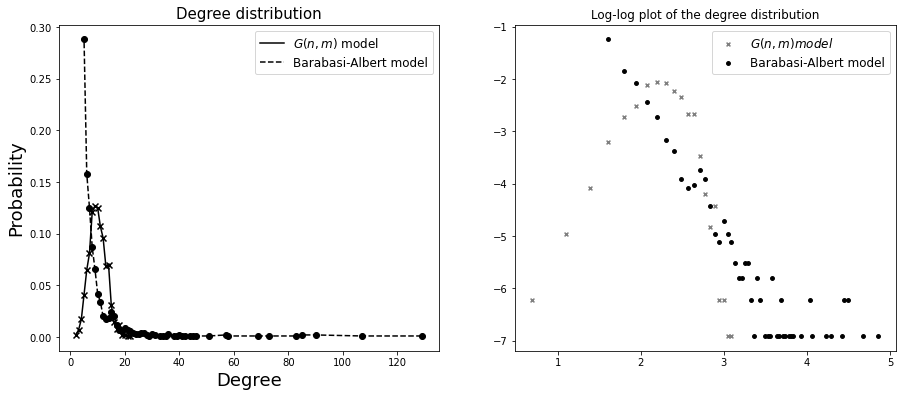

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
G = nx.gnm_random_graph(1000,5000)
deg,cnt = degree_distribution(G)
cnt = [item/1000 for item in cnt]
plt.plot(deg,cnt,color = "black",label="$G(n,m)$ model")

G = nx.barabasi_albert_graph(1000,5)
deg1,cnt1 = degree_distribution(G,)
cnt1 = [item/1000 for item in cnt1]
plt.plot(deg1,cnt1,'--',color = "black",label = "Barabasi-Albert model")
plt.legend(fontsize=12)
plt.scatter(deg,cnt,color = "black",marker = "x")
plt.scatter(deg1,cnt1,color = "black")
plt.xlabel("Degree",fontsize= 18)
plt.ylabel("Probability",fontsize= 18)
plt.title("Degree distribution",fontsize= 15)

plt.subplot(1,2,2)
log_deg = [log(item) for item in deg];log_cnt = [log(item) for item in cnt]
log_deg1 = [log(item) for item in deg1];log_cnt1 = [log(item) for item in cnt1]
plt.scatter(log_deg,log_cnt,marker = "x",color = "grey",s=15,label = "$G(n,m) model$")
plt.scatter(log_deg1,log_cnt1,marker = "o",color = "black",s=15,label = "Barabasi-Albert model")
plt.legend(fontsize=12)
plt.title("Log-log plot of the degree distribution")
plt.savefig("figures/degree_distribution.eps",format = "eps")

In [21]:
n = 20
graphs,df = ut.random_networks(n,False,1000)
mari = [cx.MAri(g) for g in graphs]
mag = [cx.MAg(g) for g in graphs]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


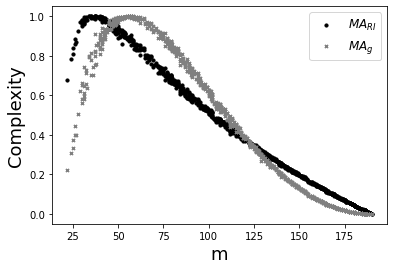

In [22]:
plt.scatter(df["Number_of_edges"],mari,label = "$MA_{RI}$",color = "black",marker = "o",s=10)
plt.scatter(df["Number_of_edges"],mag, label = "$MA_{g}$",color = "grey",marker = "x",s=10)
plt.legend(fontsize=12)
plt.xlabel("m",fontsize= 18)
plt.ylabel("Complexity",fontsize= 18)
plt.savefig("figures/mariandmag.eps",format="eps")

1.5333333333333334

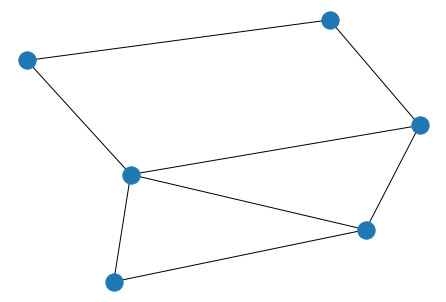

In [14]:
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

G.add_edge(1,2)
G.add_edge(3,2)
G.add_edge(5,2)
G.add_edge(1,4)
G.add_edge(3,5)
G.add_edge(3,6)
G.add_edge(4,5)
G.add_edge(5,6)
nx.draw(G)
nx.average_shortest_path_length(G)